In [12]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 22.7 MB/s eta 0:00:00


In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


Definisikan variabel fuzzy

In [14]:
pendapatan = ctrl.Antecedent(np.arange(0, 10001, 1), 'pendapatan')
utang = ctrl.Antecedent(np.arange(0, 5001, 1), 'utang')
riwayat_kredit = ctrl.Antecedent(np.arange(0, 11, 1), 'riwayat_kredit')


 Variabel output

In [15]:
kelayakan_kredit = ctrl.Consequent(np.arange(0, 101, 1), 'kelayakan_kredit')


Definisikan fungsi keanggotaan untuk pendapatan

In [16]:
pendapatan['rendah'] = fuzz.trimf(pendapatan.universe, [0, 0, 3000])
pendapatan['sedang'] = fuzz.trimf(pendapatan.universe, [2000, 5000, 8000])
pendapatan['tinggi'] = fuzz.trimf(pendapatan.universe, [6000, 10000, 10000])



Definisikan fungsi keanggotaan untuk utang

In [17]:
utang['rendah'] = fuzz.trimf(utang.universe, [0, 0, 1500])
utang['sedang'] = fuzz.trimf(utang.universe, [1000, 2500, 4000])
utang['tinggi'] = fuzz.trimf(utang.universe, [3000, 5000, 5000])



Definisikan fungsi keanggotaan untuk riwayat kredit

In [18]:
riwayat_kredit['buruk'] = fuzz.trimf(riwayat_kredit.universe, [0, 0, 4])
riwayat_kredit['sedang'] = fuzz.trimf(riwayat_kredit.universe, [2, 5, 8])
riwayat_kredit['baik'] = fuzz.trimf(riwayat_kredit.universe, [6, 10, 10])



Definisikan fungsi keanggotaan untuk kelayakan kredit

In [19]:
kelayakan_kredit['rendah'] = fuzz.trimf(kelayakan_kredit.universe, [0, 0, 50])
kelayakan_kredit['sedang'] = fuzz.trimf(kelayakan_kredit.universe, [25, 50, 75])
kelayakan_kredit['tinggi'] = fuzz.trimf(kelayakan_kredit.universe, [50, 100, 100])



Definisikan aturan fuzzy

In [20]:
aturan1 = ctrl.Rule(pendapatan['rendah'] & utang['tinggi'] & riwayat_kredit['buruk'], kelayakan_kredit['rendah'])
aturan2 = ctrl.Rule(pendapatan['sedang'] & utang['sedang'] & riwayat_kredit['sedang'], kelayakan_kredit['sedang'])
aturan3 = ctrl.Rule(pendapatan['tinggi'] & utang['rendah'] & riwayat_kredit['baik'], kelayakan_kredit['tinggi'])
aturan4 = ctrl.Rule(pendapatan['sedang'] & utang['rendah'] & riwayat_kredit['baik'], kelayakan_kredit['tinggi'])
aturan5 = ctrl.Rule(pendapatan['rendah'] & utang['rendah'] & riwayat_kredit['sedang'], kelayakan_kredit['sedang'])



Buat sistem kontrol dan simulasi

In [21]:
sistem_kredit = ctrl.ControlSystem([aturan1, aturan2, aturan3, aturan4, aturan5])
simulasi_kredit = ctrl.ControlSystemSimulation(sistem_kredit)


Masukkan nilai input

In [22]:
simulasi_kredit.input['pendapatan'] = 4000
simulasi_kredit.input['utang'] = 2000
simulasi_kredit.input['riwayat_kredit'] = 7


Hitung hasil

In [23]:
simulasi_kredit.compute()

print(f"Kelayakan Kredit: {simulasi_kredit.output['kelayakan_kredit']:.2f}")


Kelayakan Kredit: 50.00


Visualisasikan hasil

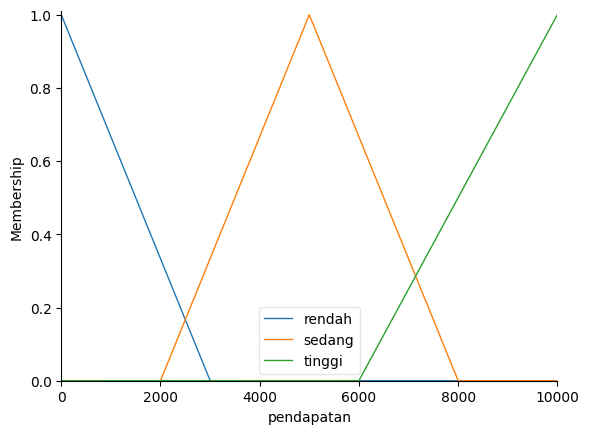

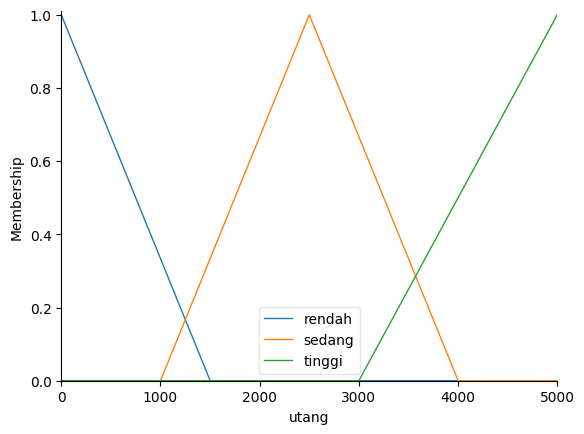

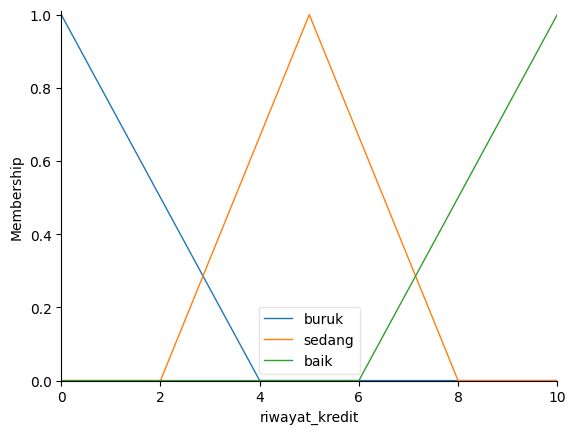

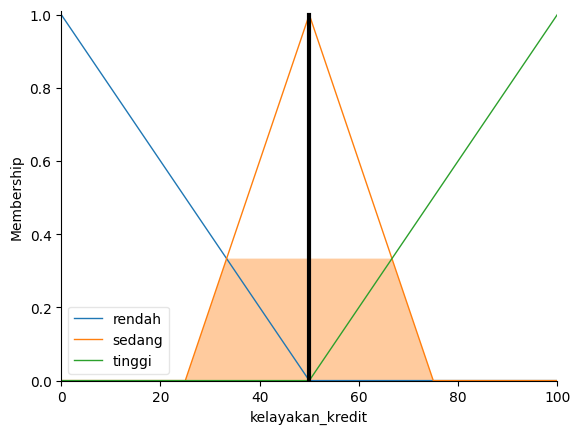

In [28]:
pendapatan.view()
plt.show()

utang.view()
plt.show()

riwayat_kredit.view()
plt.show()

kelayakan_kredit.view(sim=simulasi_kredit)
plt.show()

